In [4]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat # Not entirely sure how to import the raw .mat data

mat_data = loadmat("Matlab Files/608_Depression_REST.mat")

In [5]:
eeg_signal = mat_data['EEG']['data'][0,0]

sampling_rate =  mat_data['EEG']['srate'][0,0][0,0]

chanlocs = mat_data['EEG']['chanlocs'][0,0]
channel_names = [str(chan[0]) for chan in chanlocs['labels'][0]]

In [6]:
mat_data['EEG'].dtype.names

('setname',
 'filename',
 'filepath',
 'subject',
 'group',
 'condition',
 'session',
 'comments',
 'nbchan',
 'trials',
 'pnts',
 'srate',
 'xmin',
 'xmax',
 'times',
 'data',
 'icaact',
 'icawinv',
 'icasphere',
 'icaweights',
 'icachansind',
 'chanlocs',
 'urchanlocs',
 'chaninfo',
 'ref',
 'event',
 'urevent',
 'eventdescription',
 'epoch',
 'epochdescription',
 'reject',
 'stats',
 'specdata',
 'specicaact',
 'splinefile',
 'icasplinefile',
 'dipfit',
 'history',
 'saved',
 'etc')

In [7]:
channel_names

['FP1',
 'FPZ',
 'FP2',
 'AF3',
 'AF4',
 'F7',
 'F5',
 'F3',
 'F1',
 'FZ',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCZ',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'T7',
 'C5',
 'C3',
 'C1',
 'CZ',
 'C2',
 'C4',
 'C6',
 'T8',
 'M1',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPZ',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'M2',
 'P7',
 'P5',
 'P3',
 'P1',
 'PZ',
 'P2',
 'P4',
 'P6',
 'P8',
 'PO7',
 'PO5',
 'PO3',
 'POZ',
 'PO4',
 'PO6',
 'PO8',
 'CB1',
 'O1',
 'OZ',
 'O2',
 'CB2',
 'HEOG',
 'VEOG',
 'EKG']

In [8]:
info = mne.create_info(ch_names=channel_names, sfreq=sampling_rate, ch_types=['eeg']*59+['misc']+['eeg']*3+['misc']+['eog']*2+['ecg'])

In [9]:
info.set_montage("standard_1020", match_case=False, on_missing='warn')

<Info | 8 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 62 EEG, 2 misc, 2 EOG, 1 ECG
 custom_ref_applied: False
 dig: 65 items (3 Cardinal, 62 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 67
 projs: []
 sfreq: 500.0 Hz
>

In [10]:
raw = mne.io.RawArray(eeg_signal, info)

Creating RawArray with float64 data, n_channels=67, n_times=248480
    Range : 0 ... 248479 =      0.000 ...   496.958 secs
Ready.


raw.plot(scalings='auto')

In [19]:
# Let's work with theta data for now

filtered_data = raw.copy().filter(l_freq=0.1, h_freq=50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 16501 samples (33.002 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


In [21]:
filtered_data.plot(scalings='auto')

Using qt as 2D backend.


In [23]:
ica=mne.preprocessing.ICA(n_components=0.99, max_iter='auto', random_state=42)
ica.fit(filtered_data)

Fitting ICA to data using 62 channels (please be patient, this may take a while)
Selecting by explained variance: 17 components
Fitting ICA took 3.3s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,33 iterations on raw data (248480 samples)
ICA components,17
Available PCA components,62
Channel types,eeg
ICA components marked for exclusion,—


In [25]:
print(ica.get_explained_variance_ratio(filtered_data))
ica.plot_sources(filtered_data)

{'eeg': 0.9880503723527797}
Creating RawArray with float64 data, n_channels=20, n_times=248480
    Range : 0 ... 248479 =      0.000 ...   496.958 secs
Ready.


In [27]:
ica.find_bads_ecg(filtered_data, ch_name='EKG')

Using threshold: 0.23 for CTPS ECG detection
Using channel EKG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 723 (average pulse 87.29072762395364 / min.)
Not setting metadata
723 matching events found
No baseline correction applied
Using data from preloaded Raw for 723 events and 501 original time points ...
1 bad epochs dropped


([14],
 array([0.11912975, 0.04366189, 0.03046504, 0.0414116 , 0.04257946,
        0.03340851, 0.04310831, 0.03852648, 0.03385961, 0.03056902,
        0.05086662, 0.03115586, 0.05023432, 0.20712678, 0.72993508,
        0.03286279, 0.07439486]))

In [29]:
ica.find_bads_eog(filtered_data, ch_name='HEOG')

Using EOG channel: HEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


([0],
 array([ 0.94647058,  0.05431127,  0.11286957,  0.09274577,  0.08770565,
         0.03540319, -0.07395471, -0.06336071,  0.06726406,  0.02115301,
        -0.06014828,  0.02107556,  0.06571147, -0.06958835, -0.02705717,
         0.027546  , -0.03643102]))

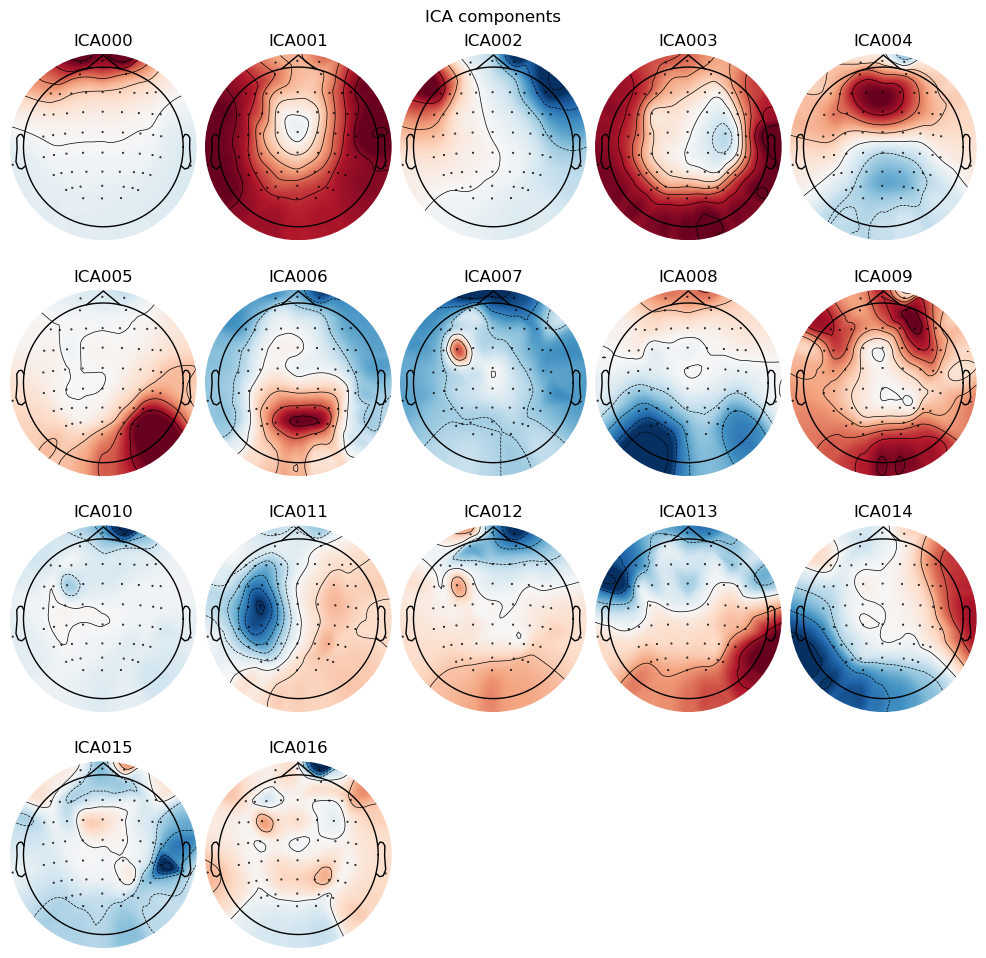

In [31]:
ica.plot_components();

Using EOG channel: EKG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


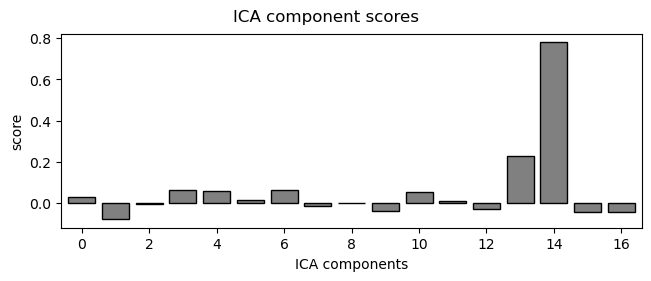

In [33]:
ekg_indices, ekg_scores = ica.find_bads_eog(filtered_data, ch_name = 'EKG');
print(ekg_indices)
ica.plot_scores(ekg_scores);

Using EOG channels: HEOG, VEOG
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.2

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 sam

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


[0, 2]


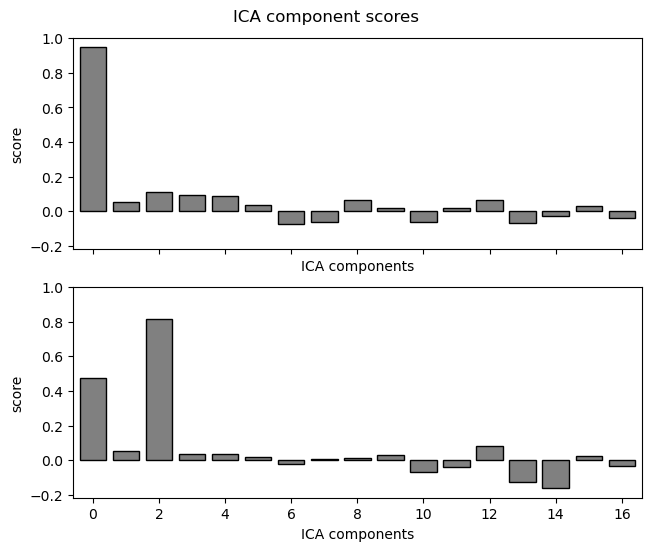

In [35]:
eog_indices, eog_scores = ica.find_bads_eog(filtered_data, ch_name = ['HEOG', 'VEOG']);
print(eog_indices)
ica.plot_scores(eog_scores);

In [37]:
ica.exclude=[0,2, 14, 13]

In [39]:
filtered_data_clean = ica.apply(filtered_data)

Applying ICA to Raw instance
    Transforming to ICA space (17 components)
    Zeroing out 4 ICA components
    Projecting back using 62 PCA components


In [41]:
filtered_data_clean.plot(scalings='auto')

Using channel EKG to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 5000 samples (10.000 s)

Number of ECG events detected : 723 (average pulse 87.29072762395364 / min.)
Not setting metadata
723 matching events found
No baseline correction applied
Using data from preloaded Raw for 723 events and 501 original time points ...
1 bad epochs dropped
Not setting metadata
722 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


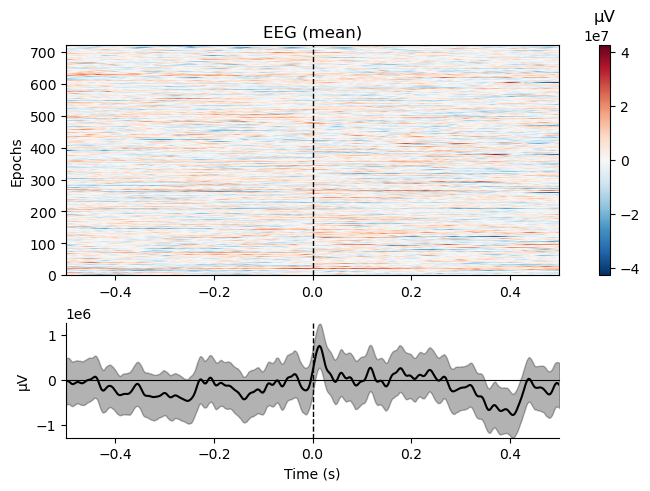

[<Figure size 640x480 with 3 Axes>]

In [63]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(filtered_data)
ecg_epochs.plot_image(combine="mean")

In [64]:
avg_ecg_epochs = ecg_epochs.average().apply_baseline((-0.5, -0.2))

Applying baseline correction (mode: mean)


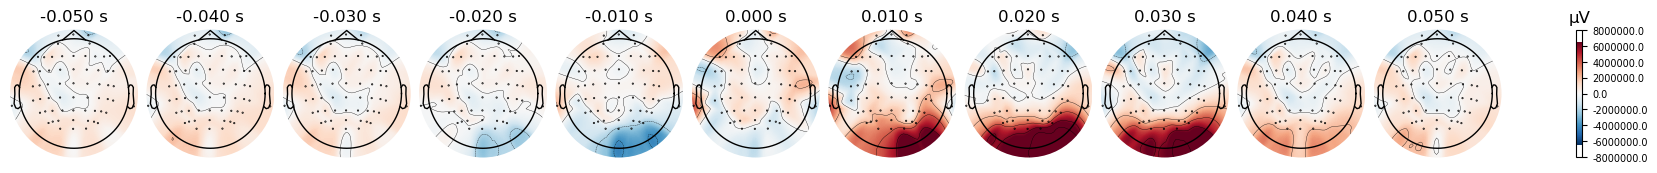

In [69]:
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11));

No projector specified for this dataset. Please consider the method self.add_proj.


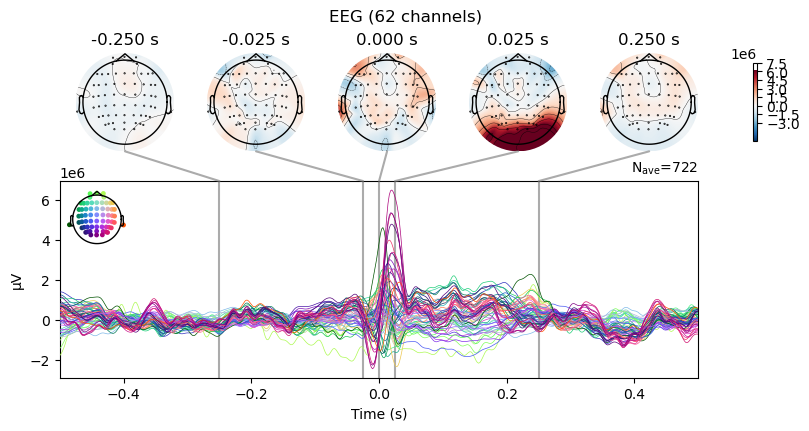

In [71]:
avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25]);